Getting Started

In [2]:
"Hello Word"

'Hello Word'

Let's create a project using finanical data and see what we can do with it

In [4]:
x = 5

In [5]:
if x > 5:
    print ('X is greater than 5'),
else:
    print ('X is less than 5')

X is less than 5


In [6]:
if x > 5:
    print ('X is greater than 5'),
elif x == 5:
    print ('X is equal to 5'),
else:
    print ('X is less than 5')

X is equal to 5


In [7]:
a = 10
b = 5
a*b

50

In [8]:
c = a/b
print(c)

2.0


In [9]:
d = (a*b)/c
print(d)

25.0


Okay, let's get serious.  Lets us Pandas package primarly for working with dataframes. Yfinance package to import data from Yahoo Finance.  Matplotlib will be used for plotting our data.

This will be a typical demostration of using these packagaes for market data analysis which will include some exploratory data analysis.  No data wrangling is needed to clean the data because Yfiance has done the work for us.

Let's get to work!

Install packages

In [12]:
pip install pandas
pip install yfinance
pip install matplotlib

SyntaxError: invalid syntax (1400038540.py, line 1)

Import packages

In [20]:
import math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Downland data for Tesla from 2023-01-01 -> 2024-10-24

In [22]:
data = yf.download('TSLA',start='2023-01-01')

[*********************100%***********************]  1 of 1 completed


Review the dataframe and get some insights to the data

In [25]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000


In [28]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900
2024-10-21 00:00:00+00:00,218.850006,218.850006,220.479996,215.729996,218.899994,47329000
2024-10-22 00:00:00+00:00,217.970001,217.970001,218.220001,215.259995,217.309998,43268700
2024-10-23 00:00:00+00:00,213.649994,213.649994,218.720001,212.110001,217.130005,80938900
2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,203628300


In [30]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02
mean,210.713991,210.713991,214.836447,206.212105,210.478948,1.178997e+08
std,37.389895,37.389895,37.958483,36.978801,37.579151,4.022378e+07
min,108.099998,108.099998,111.750000,101.809998,103.000000,4.326870e+07
25%,180.702503,180.702503,184.659996,177.132500,181.477501,8.869658e+07
50%,208.970001,208.970001,214.730003,205.730003,210.089996,1.121044e+08
75%,243.089996,243.089996,248.622505,238.779995,243.275005,1.370139e+08
max,293.339996,293.339996,299.290009,289.519989,296.040009,3.065906e+08


Take a look at one unique column in the dataframe, Close

In [33]:
data['Close']

Ticker,TSLA
Date,
2023-01-03 00:00:00+00:00,108.099998
2023-01-04 00:00:00+00:00,113.639999
2023-01-05 00:00:00+00:00,110.339996
2023-01-06 00:00:00+00:00,113.059998
2023-01-09 00:00:00+00:00,119.769997
...,...
2024-10-18 00:00:00+00:00,220.699997
2024-10-21 00:00:00+00:00,218.850006
2024-10-22 00:00:00+00:00,217.970001


Using Telsa stock price data, we are going to calculate (1) Moving Average (2) Roling % change Volatility Estimator (3) Rolling Rank.

First up, 20 day moving average price. This should add an extra column to our dataframe which we will call, SMA20.

In [36]:
data['SMA20'] = data['Close'].rolling(window=20).mean()

In [38]:
data

Price,Adj Close,Close,High,Low,Open,Volume,SMA20
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,NaN
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,NaN
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,NaN
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,NaN
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,NaN
...,...,...,...,...,...,...,...
2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900,240.999001
2024-10-21 00:00:00+00:00,218.850006,218.850006,220.479996,215.729996,218.899994,47329000,239.441501


As we choose to use a 20 day average you will see the first 19 days are NaN

In [41]:
data.head(25)

Price,Adj Close,Close,High,Low,Open,Volume,SMA20
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,NaN
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,NaN
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,NaN
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,NaN
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,NaN
2023-01-10 00:00:00+00:00,118.849998,118.849998,122.760002,114.919998,121.070000,167642500,NaN
2023-01-11 00:00:00+00:00,123.220001,123.220001,125.949997,120.510002,122.089996,183810800,NaN
2023-01-12 00:00:00+00:00,123.559998,123.559998,124.129997,117.000000,122.559998,169400900,NaN


Now do the same thing using a 50 day average.  This new column in the dataframe will be called SMA50

In [44]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data.head(55)

Price,Adj Close,Close,High,Low,Open,Volume,SMA20,SMA50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,NaN,NaN
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,NaN,NaN
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,NaN,NaN
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,NaN,NaN
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,NaN,NaN
2023-01-10 00:00:00+00:00,118.849998,118.849998,122.760002,114.919998,121.070000,167642500,NaN,NaN
2023-01-11 00:00:00+00:00,123.220001,123.220001,125.949997,120.510002,122.089996,183810800,NaN,NaN
2023-01-12 00:00:00+00:00,123.559998,123.559998,124.129997,117.000000,122.559998,169400900,NaN,NaN


Since we have both 20 and 50 day moving average, we can calculate our next requirement roling % change volatility estimator.  Using % change this is the one day daily returned with a 21 day window. We are using standard deviation aka volatility.

In [47]:
data['Close'].pct_change().rolling(window=21).std()

Ticker,TSLA
Date,
2023-01-03 00:00:00+00:00,NaN
2023-01-04 00:00:00+00:00,NaN
2023-01-05 00:00:00+00:00,NaN
2023-01-06 00:00:00+00:00,NaN
2023-01-09 00:00:00+00:00,NaN
...,...
2024-10-18 00:00:00+00:00,0.029588
2024-10-21 00:00:00+00:00,0.029289
2024-10-22 00:00:00+00:00,0.026664


To annualised this, we get a daily 21 day annualised volatility

In [52]:
data['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)

Ticker,TSLA
Date,
2023-01-03 00:00:00+00:00,NaN
2023-01-04 00:00:00+00:00,NaN
2023-01-05 00:00:00+00:00,NaN
2023-01-06 00:00:00+00:00,NaN
2023-01-09 00:00:00+00:00,NaN
...,...
2024-10-18 00:00:00+00:00,0.469700
2024-10-21 00:00:00+00:00,0.464955
2024-10-22 00:00:00+00:00,0.423284


Add this to our dataframe and call it Vol

In [55]:
data['Vol'] = data['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)
data

Price,Adj Close,Close,High,Low,Open,Volume,SMA20,SMA50,Vol
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,NaN,NaN,NaN
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,NaN,NaN,NaN
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,NaN,NaN,NaN
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,NaN,NaN,NaN
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900,240.999001,227.383401,0.469700
2024-10-21 00:00:00+00:00,218.850006,218.850006,220.479996,215.729996,218.899994,47329000,239.441501,227.760401,0.464955


The final calculation is rolling % rank.  It looks at the last set of data using the last data point to compute the percentile of the data point realtive to the window of data in question.  The window used here is 21 days.  Using pct=True, what that means is 10/24/24, 0.952381 is the 95 percentile price over the last 21 days.

In [59]:
data['Close'].rolling(window=21).rank(pct=True)

Ticker,TSLA
Date,
2023-01-03 00:00:00+00:00,NaN
2023-01-04 00:00:00+00:00,NaN
2023-01-05 00:00:00+00:00,NaN
2023-01-06 00:00:00+00:00,NaN
2023-01-09 00:00:00+00:00,NaN
...,...
2024-10-18 00:00:00+00:00,0.190476
2024-10-21 00:00:00+00:00,0.095238
2024-10-22 00:00:00+00:00,0.095238


Add this to our dataframe

In [65]:
data['PCT Rank'] = data['Close'].rolling(window=21).rank(pct=True)
data

Price,Adj Close,Close,High,Low,Open,Volume,SMA20,SMA50,Vol,PCT Rank
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2023-01-03 00:00:00+00:00,108.099998,108.099998,118.800003,104.639999,118.470001,231402800,NaN,NaN,NaN,NaN
2023-01-04 00:00:00+00:00,113.639999,113.639999,114.589996,107.519997,109.110001,180389000,NaN,NaN,NaN,NaN
2023-01-05 00:00:00+00:00,110.339996,110.339996,111.750000,107.160004,110.510002,157986300,NaN,NaN,NaN,NaN
2023-01-06 00:00:00+00:00,113.059998,113.059998,114.389999,101.809998,103.000000,220911100,NaN,NaN,NaN,NaN
2023-01-09 00:00:00+00:00,119.769997,119.769997,123.519997,117.110001,118.959999,190284000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900,240.999001,227.383401,0.469700,0.190476
2024-10-21 00:00:00+00:00,218.850006,218.850006,220.479996,215.729996,218.899994,47329000,239.441501,227.760401,0.464955,0.095238


Let's plot some data from our dataframe

In [68]:
to_plot = ['Close','SMA20', 'SMA50']

<Axes: xlabel='Date'>

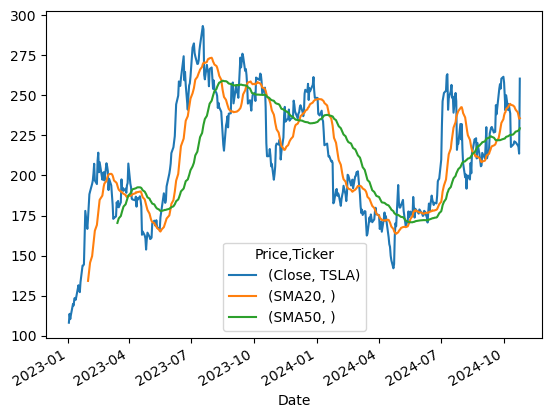

In [77]:
data[to_plot].plot()

Nice trick, to look at the numbers in the plot put # in front of .plot

In [79]:
data[to_plot]#.plot()

Price,Close,SMA20,SMA50
Ticker,TSLA,,
Date,,,
2023-01-03 00:00:00+00:00,108.099998,NaN,NaN
2023-01-04 00:00:00+00:00,113.639999,NaN,NaN
2023-01-05 00:00:00+00:00,110.339996,NaN,NaN
2023-01-06 00:00:00+00:00,113.059998,NaN,NaN
2023-01-09 00:00:00+00:00,119.769997,NaN,NaN
...,...,...,...
2024-10-18 00:00:00+00:00,220.699997,240.999001,227.383401
2024-10-21 00:00:00+00:00,218.850006,239.441501,227.760401


Now plot historical volatility.  As of October 2024, you can see as the price increased, volatility decreased.  This is not good for long options holders.

NameError: name 'plot' is not defined

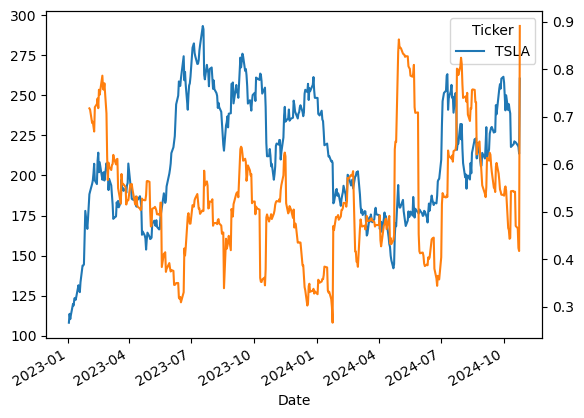

In [84]:
ax = data['Close'].plot()
data.Vol.plot(secondary_y=True, ax=ax)
plot.show()

Last plot is % rank which range prices from 0 - 1.  This can show if values are volatile or not.  As of October 2024, looking at the graph, the close prices are close to the overall highest prices the stock traded at.

<Axes: xlabel='Date'>

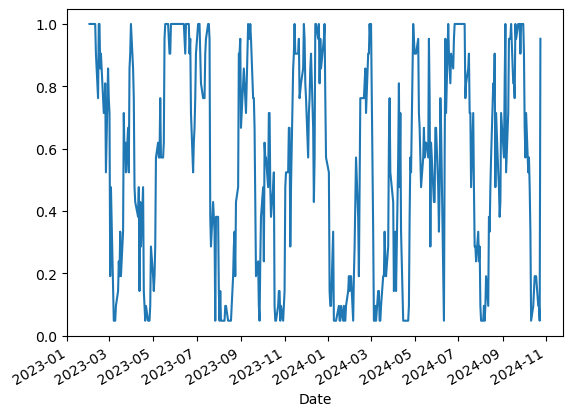

In [92]:
data['PCT Rank']. plot()

In [94]:
data['PCT Rank']#. plot()

Date
2023-01-03 00:00:00+00:00         NaN
2023-01-04 00:00:00+00:00         NaN
2023-01-05 00:00:00+00:00         NaN
2023-01-06 00:00:00+00:00         NaN
2023-01-09 00:00:00+00:00         NaN
                               ...   
2024-10-18 00:00:00+00:00    0.190476
2024-10-21 00:00:00+00:00    0.095238
2024-10-22 00:00:00+00:00    0.095238
2024-10-23 00:00:00+00:00    0.047619
2024-10-24 00:00:00+00:00    0.952381
Name: PCT Rank, Length: 456, dtype: float64